In [4]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기
#!pip install tensorflow matplotlib
#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [6]:
# 여기에서 확인해 보세요.
print(train_images.shape, train_labels.shape)   
print(test_images.shape , test_labels.shape)   

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요. 
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [8]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2,2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64))  # TODO: 은닉층 유닛 수 설정
model.add(layers.Dense(10))  # 출력층: CIFAR-10은 클래스가 10개

/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요. 
(padding은 디폴트로 없습니다.)

Answer

첫 번째 합성곱 레이어 : (32 - 3)//1 + 1  -> (30, 30, 32)

첫 번째 풀링 레이어: (30/2, 30/2) -> (15,15,32)

두 번쨰 합성곱 레이어: (15 - 3)/1 + 1 -> (13, 13, 64)

두 번째 풀링 레이어 : (13//2, 13//2) -> (6, 6, 64)

세 번째 합성곱 레이어 : (6 - 3)//1 + 1 -> (4, 4, 64)

Flatten : 4 * 4 * 64 = 1024

In [9]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1055 - loss: 3.8596 - val_accuracy: 0.1002 - val_loss: 2.3030
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0998 - loss: 2.3036 - val_accuracy: 0.1003 - val_loss: 2.3036
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0983 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0987 - loss: 2.3034 - val_accuracy: 0.1002 - val_loss: 2.3033
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1008 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0994 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0976 - loss: 2.3041 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0977 - loss: 2

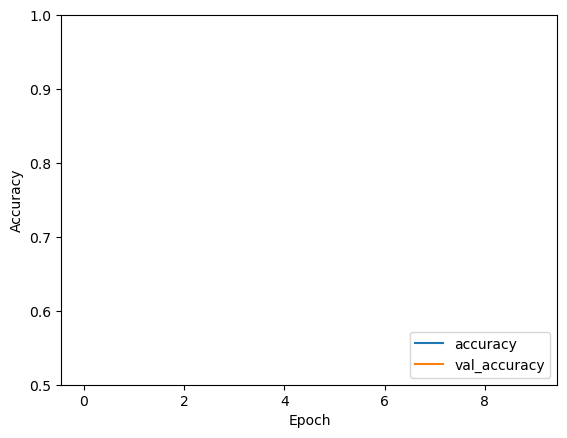

In [10]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [11]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.10000000149011612


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


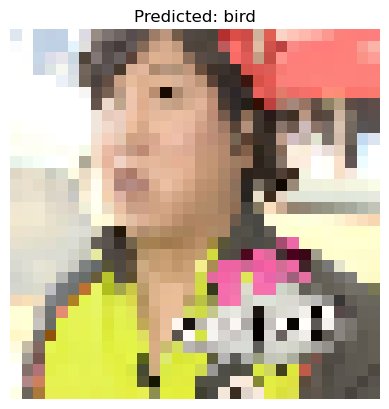

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32,32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화 

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path = "/Users/sunrise/Desktop/25Analysis_BASE-Week1/jung.png"
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer: 대부분의 이미지 픽셀값이 0~255사이의 정수를 갖는다. 대부분의 디지털 이미지는 8비트 per channel로 구성된다. 

이때 8비트는  $2^8=256$ 개의 값을 표현할 수 있다. 결국 이 값들을 가지고 0부터 255까지의 정수로 픽셀값을 할당하게 되는 것이다. 

따라서 각 픽셀의 채널(R, G, B) 값도 0에서 255 사이의 정수로 나타나기에 이를 정 0~1사이의 구간으로 정규화 시키기 위해서는 255로 나누는 과정이 필요하다.


## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer: 

CNN inductive Bias
- Translation Invariance : CNN은 입력 내에서 패턴의 위치가 변해도 인식할 수 있도록 설계되어있는데 이는 합성곱 연산이 이미지를 전체적으로 훑으며 어디에 있든 동일한 특징을 찾도록 만들기 때문이다.

- Local Receptive Fields : CNN의 각 뉴런은 입력 전체가 아니라 일부분(로컬 패치, 수용영역)만 관찰하는데 이는 이미지 내 의미 있는 정보가 인근 픽셀 조합(국소 구조)에서 많이 출현한다는 가정에서 출발한다.

-  Hierarchical Feature Learning : 복잡한 정보는 단순한 특징의 조합으로 나타난다는 전제에 기반해 여러 계층을 쌓으면서 간단한 특징에서 복잡한 패턴까지 점진적으로 학습한다.

이미지 처리에 좋은 이유
- 이미지의 공간 정보를 유지한 채 학습을 진행함 (2D 그대로 작업, 1D로 변환 x)
    - Fullly Connected Layer만으로 구성된 인공 신경망의 경우 평면화를 시키는 과정에서 데이터 유실이 됨 따라서 정보 부족으로 인공신경망이 특징을 추출하고 학습하는데 비효율적이고 정확도를 높이는데 있어 한계 발생하기에 CNN은 공간정보를 유지한 채 학습을 진행해 공간정보의 유실을 최소화한다. 
- 데이터를 직접 학습하고 패턴을 사용해 이미지 분류하고, 특징맵을 생성하는 필터까지도 학습하기에 비전(vision) 분야에서 성능 우수하다.

CNN을 잘 쓸 수 있는 분야
- NLP : 문장분류, 감성분석 등에서 1차원 CNN을 사용한다. 이는 CNN이 n-gram 형태의 로컬 패턴을 효과적으로 추출할 수 있기 때문이다.
- 음성 신호 처리 : 음성 신호를 Spectrogram(음향의 시간-주파수 이미지)으로 변환하면 2차원 이미지와 유사하게 CNN을 적용할 수 있다고 한다.